<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    54.266279  49.846687  89.788729 -164.187208   39.714486   
      1.0    79.278513  73.611907  35.879667  365.597156  564.367243   
      2.0    89.458052  81.226335  43.234374   78.289731  302.208492   
      3.0    22.100758  96.049180  73.842106 -322.416244 -120.424200   
      4.0    90.533637  67.361013  34.370402 -249.631801  -47.366750   
...                ...        ...        ...         ...         ...   
999.0 25.0   55.512881  67.767928  47.014323  -72.626707  107.668425   
      26.0   95.432322  26.200930  86.304349    9.797548  227.735150   
      27.0   42.790320  46.915556  39.261788  -40.240400   98.727264   
      28.0   55.499214  36.665307  60.157215 -169.971981   -7.650245   
      29.0   48.461510  33.375414  37.275827  -37.732194   91.380556   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    123.688225  -83.973739  
      1.0    261.892671  302.474572  
      2.0    282.339412   19.869080  
      3.0    181.796721 -302.220921  
      4.0    267.739061 -315.105811  
...                 ...         ...  
999.0 25.0   181.200178  -73.531753  
      26.0   210.765967   16.969183  
      27.0   110.111252  -11.383988  
      28.0   136.627991 -144.278236  
      29.0    89.019529    2.361028  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    54.266279  49.846687  89.788729 -164.187208   39.714486   
      1.0    79.278513  73.611907  35.879667  365.597156  564.367243   
      2.0    89.458052  81.226335  43.234374   78.289731  302.208492   
      3.0    22.100758  96.049180  73.842106 -322.416244 -120.424200   
      4.0    90.533637  67.361013  34.370402 -249.631801  -47.366750   
...                ...        ...        ...         ...         ...   
999.0 25.0   55.512881  67.767928  47.014323  -72.626707  107.668425   
      26.0   95.432322  26.200930  86.304349    9.797548  227.735150   
      27.0   42.790320  46.915556  39.261788  -40.240400   98.727264   
      28.0   55.499214  36.665307  60.157215 -169.971981   -7.650245   
      29.0   48.461510  33.375414  37.275827  -37.732194   91.380556   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    123.688225  -83.973739  
      1.0    261.892671  302.474572  
      2.0    282.339412   19.869080  
      3.0    181.796721 -302.220921  
      4.0    267.739061 -315.105811  
...                 ...         ...  
999.0 25.0   181.200178  -73.531753  
      26.0   210.765967   16.969183  
      27.0   110.111252  -11.383988  
      28.0   136.627991 -144.278236  
      29.0    89.019529    2.361028  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    54.266279  49.846687  89.788729 -164.187208   39.714486   
      1.0    79.278513  73.611907  35.879667  365.597156  564.367243   
      2.0    89.458052  81.226335  43.234374   78.289731  302.208492   
      3.0    22.100758  96.049180  73.842106 -322.416244 -120.424200   
      4.0    90.533637  67.361013  34.370402 -249.631801  -47.366750   
...                ...        ...        ...         ...         ...   
999.0 25.0   55.512881  67.767928  47.014323  -72.626707  107.668425   
      26.0   95.432322  26.200930  86.304349    9.797548  227.735150   
      27.0   42.790320  46.915556  39.261788  -40.240400   98.727264   
      28.0   55.499214  36.665307  60.157215 -169.971981   -7.650245   
      29.0   48.461510  33.375414  37.275827  -37.732194   91.380556   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    123.688225  -83.973739  
      1.0    261.892671  302.474572  
      2.0    282.339412   19.869080  
      3.0    181.796721 -302.220921  
      4.0    267.739061 -315.105811  
...                 ...         ...  
999.0 25.0   181.200178  -73.531753  
      26.0   210.765967   16.969183  
      27.0   110.111252  -11.383988  
      28.0   136.627991 -144.278236  
      29.0    89.019529    2.361028  

[30000 rows x 7 columns]

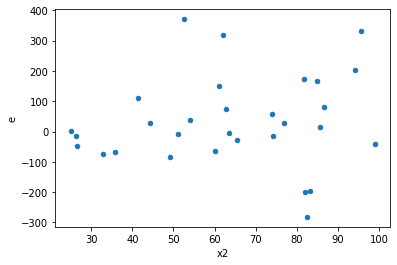

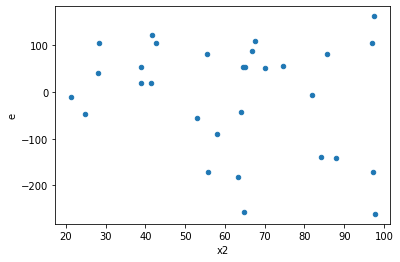

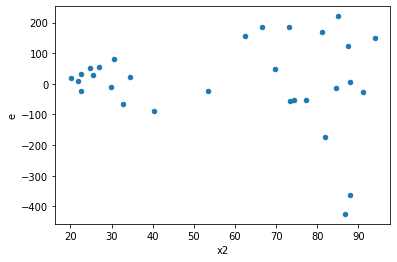

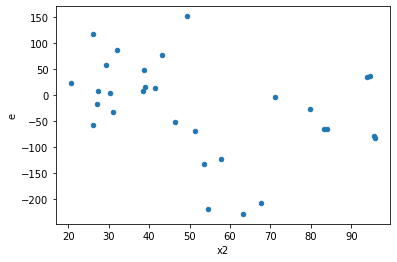

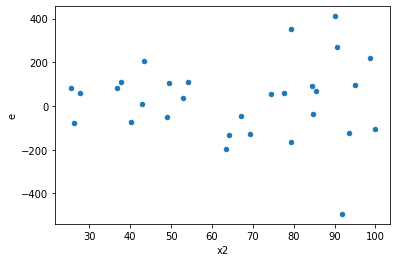

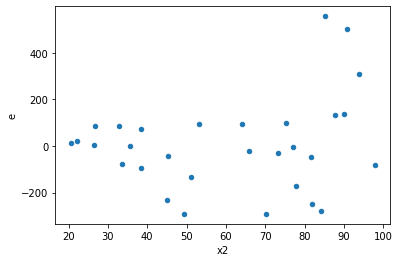

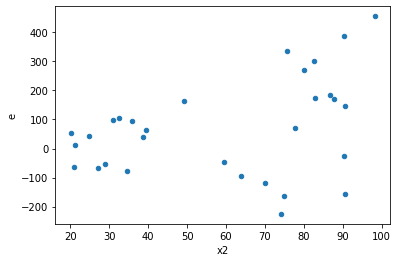

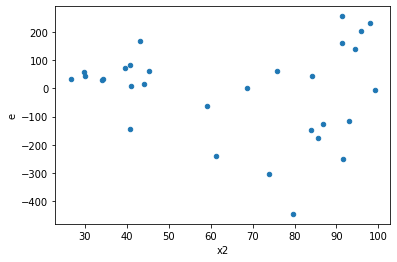

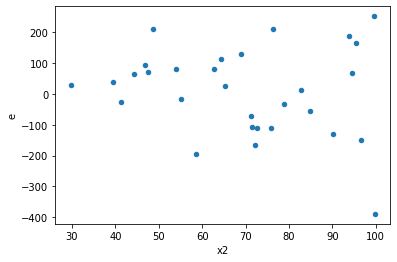

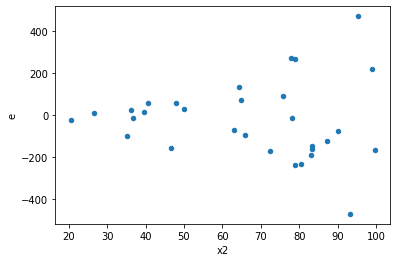

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,18.0,6.0,413863.1847496832,289811.4317373394,22992.399152760176,48301.90528955657,2.1007770858813597,0.36534065392334614,0.8173296730383269,0.18267032696167307,Reject005=1 : Homoscedasticity
2.0,12.0,12.0,193970.84970134866,419612.9197364413,16164.237475112388,34967.743311370104,2.163278247130985,0.19580594749804825,0.9020970262509759,0.09790297374902412,Reject005=1 : Homoscedasticity
4.0,12.0,12.0,111006.14963757554,231280.50721313982,9250.51246979796,19273.375601094984,2.0834927431340384,0.21797019955681773,0.8910149002215911,0.10898509977840887,Reject005=1 : Homoscedasticity
7.0,19.0,5.0,325935.4264216667,237610.41141859323,17154.496127456143,47522.08228371864,2.770240637243697,0.2624754458250602,0.8687622770874699,0.1312377229125301,Reject005=1 : Homoscedasticity
9.0,7.0,17.0,39586.70895167614,643795.8676407146,5655.244135953734,37870.34515533615,6.696500494925047,0.0013276186804578316,0.9993361906597711,0.0006638093402289158,Reject005=0 : Heteroscedasticity
12.0,15.0,9.0,111365.02092211596,342459.76189909724,7424.334728141064,38051.08465545525,5.1251844170262295,0.017871451957312434,0.9910642740213438,0.008935725978656217,Reject005=0 : Heteroscedasticity
15.0,11.0,13.0,116767.37582659395,744581.2581804635,10615.215984235814,57275.48139849719,5.395602075695348,0.005454578021123702,0.9972727109894381,0.002727289010561851,Reject005=0 : Heteroscedasticity
17.0,8.0,16.0,62485.27739766464,568052.7547361291,7810.65967470808,35503.29717100807,4.545492781611303,0.009741413467549087,0.9951292932662255,0.0048707067337745436,Reject005=0 : Heteroscedasticity
20.0,18.0,6.0,141061.95481631305,89246.0195079697,7836.775267572947,14874.336584661616,1.8980174978614903,0.4386557878976418,0.7806721060511791,0.2193278939488209,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,18.0,6.0,413863.1847496832,289811.4317373394,22992.399152760176,48301.90528955657,2.1007770858813597,0.36534065392334614,Reject005=1 : Homoscedasticity
1.0,13.0,11.0,287414.2454574341,196436.6366585574,22108.788112110316,17857.876059868853,0.8077274959312228,0.705469220294437,Reject005=1 : Homoscedasticity
2.0,12.0,12.0,193970.84970134866,419612.9197364413,16164.237475112388,34967.743311370104,2.163278247130985,0.19580594749804825,Reject005=1 : Homoscedasticity
3.0,13.0,11.0,278155.4677826205,201401.82315496984,21396.574444816964,18309.256650451804,0.8557097164161704,0.7793927152886377,Reject005=1 : Homoscedasticity
4.0,12.0,12.0,111006.14963757554,231280.50721313982,9250.51246979796,19273.375601094984,2.0834927431340384,0.21797019955681773,Reject005=1 : Homoscedasticity
5.0,10.0,14.0,180520.47966046858,94083.28856977665,18052.04796604686,6720.234897841189,0.37226994468887536,0.12153708182829125,Reject005=1 : Homoscedasticity
6.0,13.0,11.0,225691.33983777487,71804.81779377554,17360.872295213452,6527.710708525049,0.3760013090082344,0.0968542872291369,Reject005=1 : Homoscedasticity
7.0,19.0,5.0,325935.4264216667,237610.41141859323,17154.496127456143,47522.08228371864,2.770240637243697,0.2624754458250602,Reject005=1 : Homoscedasticity
8.0,15.0,9.0,75418.60058889262,41630.08085422162,5027.906705926174,4625.564539357958,0.919978195678533,0.8511653342312031,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      688
Reject005=0 : Heteroscedasticity    312
Name: Result_test, dtype: int64